# 03 无监督学习与预处理

## 1 无监督学习的类型

在无监督学习中，学习算法只有输入类型，并需要从这些数据中提取知识。

这一章节将研究两种类型的无监督学习：数据集变换与聚类。

数据集的 **无监督变换（unsupervised transformation）** 是创建数据新的表示的算法，与数据的原始表示相比，新的表示可能更容易被人或机器学习算法所理解。

无监督变换的常见应用：

- 降维（dimensionality reduction）：它接受包含许多特征的高维数据，并找到表示该数据的一种新方法，用较少的特征亏可以概括其重要特性。机器学习中常为了可视化而将数据降维为二维。
- 找到“构成”数据的各个组成部分：比如对文本文档集合进行主题提取，具体而言可以用于追踪社交媒体上的话题讨论。

**聚类算法（clustering algorithm）** 将数据划分为不同的组，每组包含相似的物项。

## 2 无监督学习的挑战

无监督学习的一个主要挑战是评估算法是否学到了有用的东西。由于输入数据不包含任何标签信息，我们不知道算法正确的输出是什么，一次很难判断一个模型是否表现很好。通常来说，评估无监督学习算法的唯一方法是人工检验。

无监督学习算法通常可用于探索性的目的吗，其另一个重要应用就是作为监督学习算法的预处理步骤。学习数据的一种新表示，又是可以提高监督算法的精度或减小内存和时间开销。因此，下面先介绍几种简单常用的预处理方法。

## 3 预处理与缩放

一些算法（如神经网络与 SVM）对数据缩放非常敏感。因此，在开始训练模型之前，通常需要对特征进行调节，使数据表示更符合这些算法。通常是对数据简单地按特征进行缩放或移动。

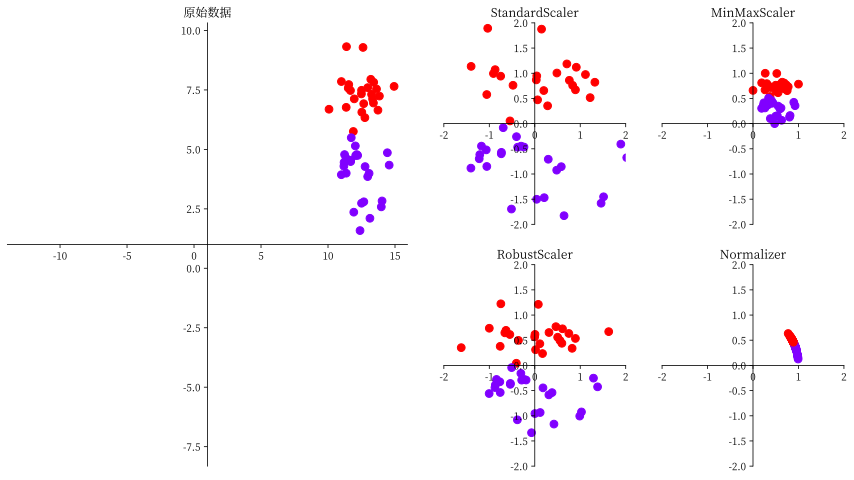

In [29]:
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

plt.rcParams["font.sans-serif"] = "Noto Serif SC"
plt.rcParams["axes.unicode_minus"] = False

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=60)
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("原始数据")
other_axes = [
    plt.subplot2grid((2, 4), (i, j)) for j in range(2, 4) for i in range(2)
]

for ax, scaler in zip(
        other_axes,
        [StandardScaler(), RobustScaler(),
         MinMaxScaler(), Normalizer(norm='l2')]
):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap='rainbow', s=60)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
plt.show()

### 3.1 不同类型的预处理

上面的图模拟的是一个包含两个特征的二分类数据集，第一个特征位于 10 到 15 之间，第二个特征位于 1 到 9之间。上面展示了 4 中数据变换方式：

- `StandardScaler`：确保每个特征的均值为 0，方差为 1，是所有特征位于同一量级。它通过移除平均值然后缩放到单位方差来标准化特征，但不能保证特征的最小值和最大值。
- `RobustScaler`：工作原理类似于 `StandardScaler`，确保每个特征的统计属性位于同一范围。但是使用中位数和四分位数而不是平均值和方差。这种缩放方法对异常值更具有鲁棒性。
- `MinMaxScaler`：将特征缩放到给定的最小值和最大值之间，通常是 0 到 1 之间。
- `Normalizer`：通过对每个数据点进行缩放，使得特征向量的欧几里得长度为 1。如果只有数据的方向（角度）是重要的，而特征向量的程度无关紧要，通常使用这种归一化。在处理稀疏矩阵时非常有用。

### 3.2 应用数据变化

以乳腺癌数据集为例，使用 `MinMaxScaler` 来预处理该数据集，并用核 SVM 来训练。

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1
)
scaler = MinMaxScaler().fit(X_train)

对缩放器实例化并使用 `fit` 方法拟合后，还需要使用缩放器的 `transform` 方法返回缩放后的数据。在 `scikit-learn` 中，每当模型返回数据的一种新表示时，都可以使用 `transform` 方法。

In [31]:
X_train_scaled = scaler.transform(X_train)
print("训练集每个特征的最小值：\n{}".format(X_train_scaled.min(axis=0)))
print("训练集每个特征的最大值：\n{}".format(X_train_scaled.max(axis=0)))

训练集每个特征的最小值：
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
训练集每个特征的最大值：
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [32]:
X_test_scaled = scaler.transform(X_test)
print("测试集每个特征的最小值：\n{}".format(X_test_scaled.min(axis=0)))
print("测试集每个特征的最大值：\n{}".format(X_test_scaled.max(axis=0)))

测试集每个特征的最小值：
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
测试集每个特征的最大值：
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


我们发现，对测试集缩放后的最大值核最小是不是 1 和 0。这是因为 `MinMaxScaler`（以及其他所有缩放器）总是对训练集和测试集应用完全相同的变换，而缩放器是在训练集上拟合的，所以它将训练集的最小值转换为 0，最大值转换为 1。然后，它使用相同的缩放参数来转换测试集，这样测试集就不会保留原始数据的分布。

### 3.3 对训练集和测试集进行相同的缩放
为了让监督模型能够在测试集上运行，对训练集和测试集应用完全相同的变换时很重要的。如果我们使用测试集的最小值和范围来进行缩放，下面的例子展示了会发生什么。

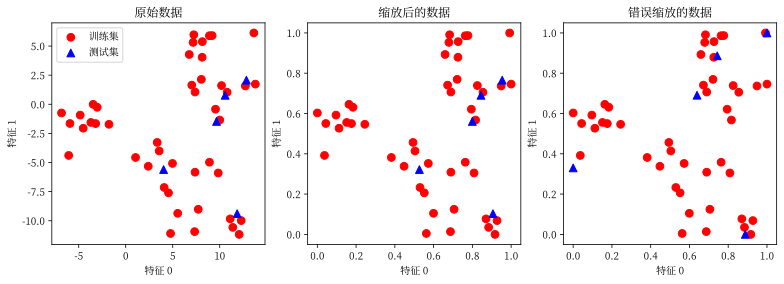

In [33]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(
    X_train[:, 0], X_train[:, 1],
    c='red', label="训练集", s=60
)
axes[0].scatter(
    X_test[:, 0], X_test[:, 1], marker='^',
    c='blue', label="测试集", s=60
)
axes[0].legend(loc='upper left')
axes[0].set_title("原始数据")

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],
    c='red', label="训练集", s=60
)
axes[1].scatter(
    X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
    c='blue', label="测试集", s=60
)
axes[1].set_title("缩放后的数据")

test_scaler = MinMaxScaler().fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
axes[2].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],
    c='red', label="训练集", s=60
)
axes[2].scatter(
    X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
    c='blue', label="测试集", s=60
)
axes[2].set_title("错误缩放的数据")

for ax in axes:
    ax.set_xlabel("特征 0")
    ax.set_ylabel("特征 1")
plt.show()

前两张图中，训练集和测试集数据点的相对位置是一致的，不同的只是坐标轴刻度。而第三张图完全改变了数据点之间的相对位置，这显然不是我们想要的。

### 3.4 预处理对监督学习的作用

现在回到乳腺癌数据集，观察使用 `MinMaxScaler` 对学习 SVC 的作用。为了对比，我们同时在原始数据上拟合 SVC。

In [34]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("测试集得分：{}".format(svm.score(X_test, y_test)))

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("缩放后的测试集得分：{}".format(svm.score(X_test_scaled, y_test)))

测试集得分：0.9440559440559441
缩放后的测试集得分：0.965034965034965


可以看到，使用数据缩放的效果很显著。下面看看另外两个缩放器的效果。

In [35]:
from sklearn.preprocessing import StandardScaler, RobustScaler

for scaler in [StandardScaler(), RobustScaler()]:
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    svm.fit(X_train_scaled, y_train)
    print("{} 缩放后的测试集得分：{}".format(
        scaler.__class__.__name__, svm.score(X_test_scaled, y_test)
    ))

StandardScaler 缩放后的测试集得分：0.958041958041958
RobustScaler 缩放后的测试集得分：0.951048951048951


## 4 降维、特征提取和流形学习

前面讨论过，利用无监督学习决心给数据变换的目的主要是可视化、压缩数据，以及寻找信息量更大的数据表示以用于进一步的处理。

为了实现这些目的，最简单也是最常用的一种方法是 **主成分分析（principal component analysis，PCA）**，此外还有两种算法：**非矩阵分解（NMF）** 和 **t-SNE**。前者通常用于特征提取，后者通常用于二维散点图的可视化。

### 4.1 主成分分析（PCA）

**主成分分析（principal component analysis，PCA）** 是一种旋转数据集的方法，旋转后的特征在统计学上不相关。在做完这种旋转后，通常根据特征对解释数据的重要性来选择它的一个子集。这种变换允许我们去掉数据中的相关性，从而找到数据中最主要的成分。PCA 的主要优点是，它是一种完全无监督的算法，不依赖于输出结果。这一点与前面介绍的无监督学习算法不同，它们都是为了获得与输出相关的数据表示。

下面的例子展示了 PCA 对二维数据集的作用。

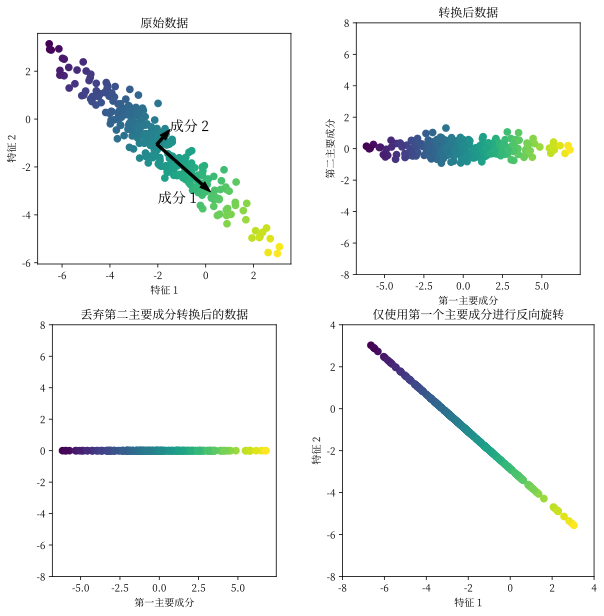

In [36]:
from sklearn.decomposition import PCA

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

S = X_pca.std(axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].set_title("原始数据")
axes[0].scatter(
    X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[0].set_xlabel("特征 1")
axes[0].set_ylabel("特征 2")
axes[0].arrow(
    pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
    S[0] * pca.components_[0, 1], width=.1, head_width=.3, color='k'
)
axes[0].arrow(
    pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
    S[1] * pca.components_[1, 1], width=.1, head_width=.3, color='k'
)
axes[0].text(-1.5, -.5, "成分 2", size=14)
axes[0].text(-2, -3.5
             , "成分 1", size=14)
axes[0].set_aspect('equal')

axes[1].set_title("转换后数据")
axes[1].scatter(
    X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[1].set_xlabel("第一主要成分")
axes[1].set_ylabel("第二主要成分")
axes[1].set_aspect('equal')
axes[1].set_ylim(-8, 8)

pca = PCA(n_components=1)
pca.fit(X_blob)
X_inverse = pca.inverse_transform(pca.transform(X_blob))

axes[2].set_title("丢弃第二主要成分转换后的数据")
axes[2].scatter(
    X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[2].set_xlabel("第一主要成分")
axes[2].set_aspect('equal')
axes[2].set_ylim(-8, 8)

axes[3].set_title("仅使用第一个主要成分进行反向旋转")
axes[3].scatter(
    X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[3].set_xlabel("特征 1")
axes[3].set_ylabel("特征 2")
axes[3].set_aspect('equal')
axes[3].set_xlim(-8, 4)
axes[3].set_ylim(-8, 4)
plt.show()

上面第一张图显示原数据点，用不同的颜色加以区分。算法首先找到方差最大的方向，将其标记为“成分 1”，这是数据中包含信息最多的方向（或向量）。然后，算法找到与“成分 1”正交的方向，即与“成分 1”垂直的方向（二维空间中只有一个方向，高维空间中有无数个），这个方向被标记为“成分 2”。利用这一过程被找到的方向称为“**主成分（principal component）**”，因为这是数据方差的主要方向。一般来说，主成分的个数与原始特征相同。

第二张图将第一张图中的数据旋转，使得第一成分与 x 轴平行，第二成分与 y 周平行，同时从数据中减去平均值，使得交换后的数据以 0 为中心。在 PCA 找到的旋转表示中，两个坐标轴是不想关的，也就是说，对这种数据表示，处理对角线，相关矩阵全部为 0。

可以通过保留一部分主成分来使用 PCA 降维。上面的第三张图仅保留了第一成分，这将数据从二维降到一维。

最后，可以反向旋转并将平均值重新加到数据，得到第四张图。这张图显示了仅使用第一成分的数据，它与原始数据相比，损失了一些信息，但是保留了数据的主要结构。这种变换又是用于去除数据中的噪声影响，或者将主成分中保留的那部分信息可视化。

#### 4.1.1 PCA 应用于乳腺癌数据集

对于含有两个以上特征的数据集，可以通过创建散点图矩阵来可视化（比如鸢尾花数据集）。但对乳腺癌数据集这种包含 30 个特征的数据集来说，需要绘制 $30 \times 14 = 420$ 张散点图，这是不可理解的。但还有一种方法：对每个特征分别计算两个类别（良性肿瘤和恶性肿瘤）的直方图。

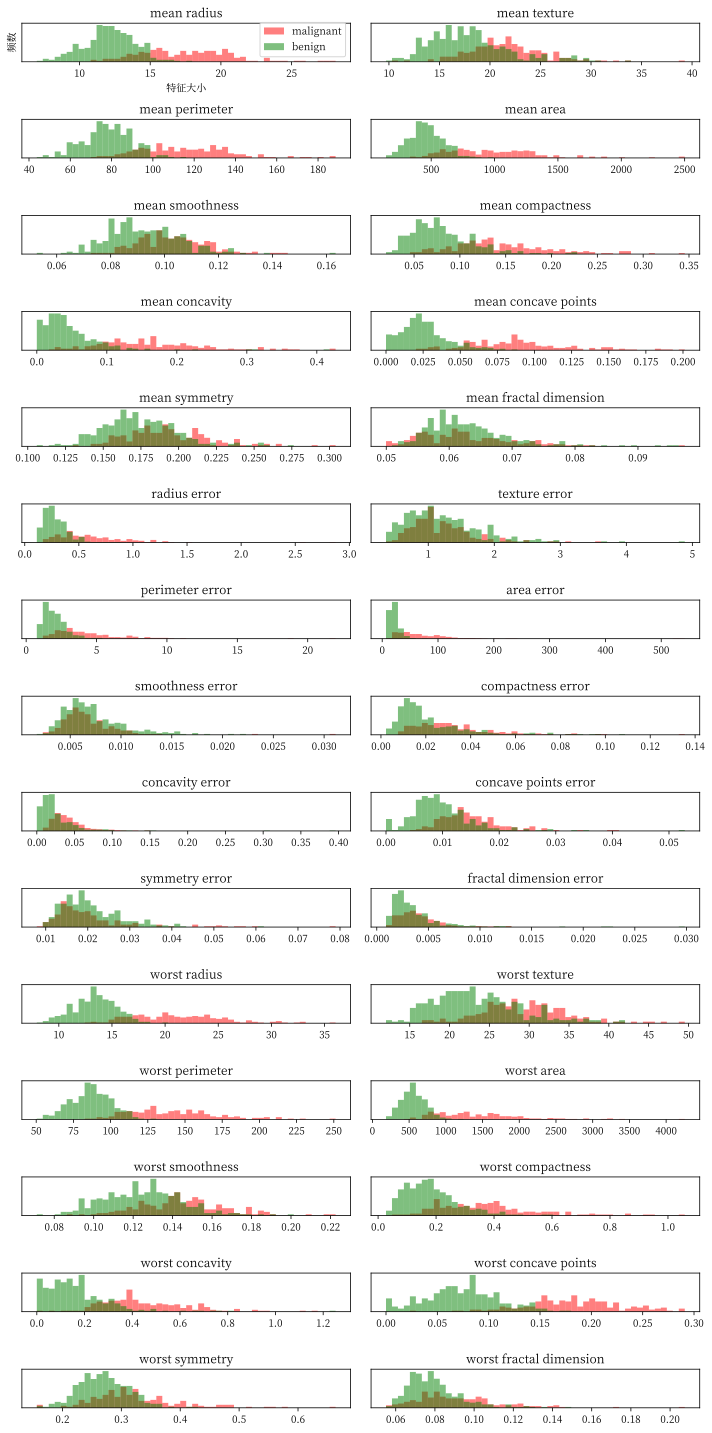

In [37]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='green', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("特征大小")
ax[0].set_ylabel("频数")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
plt.show()

通过上面的图可以了解每个特征在两个类别中的分类情况，可以猜测哪些特征能够更好地区分良性与恶性。例如，”smoothness error“特征在良性和恶性之间的分布几乎重合，因此该特征无法区分良性和恶性肿瘤。“worst concave points”特征的分布在两个类别之间有很好的区分度，因此该特征可能对区分良性和恶性肿瘤有用。

但是这种方法不能展示变量之间的相互作用以及这种相互作用与类别之间的关系。利用 PCA 可以获得主要的相互作用，并得到稍完整的图像。可以找到抢两个主要成分，并在二位空间将之可视化。

In [38]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("原始数据形状：{}".format(str(X_scaled.shape)))
print("降维后数据形状：{}".format(str(X_pca.shape)))

原始数据形状：(569, 30)
降维后数据形状：(569, 2)


应用 PCA 之前，先利用 `StandarScaler` 缩放数据，使得每个特征方差为 1。默认情况下，`PCA` 仅旋转（并移动）数据，保留所有主要成分，为了降低数据维度，需要在创建 `PCA` 对象时设置 `n_components` 参数。上面的代码将数据从 30 维降到了 2 维。下面绘制散点图。

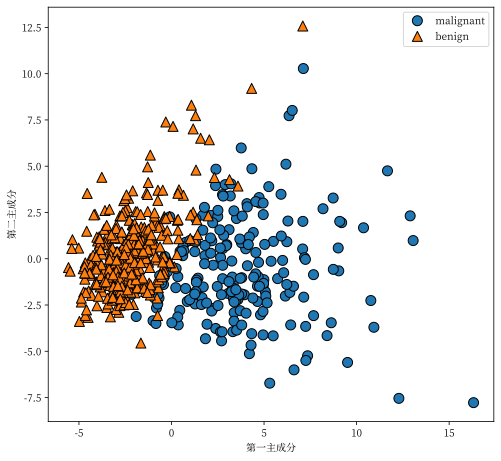

In [39]:
import matplotlib as mpl
from matplotlib.colors import colorConverter

def discrete_scatter(
        x1, x2, y=None, markers=None, s=10, ax=None, labels=None,
        padding=.2, alpha=1, c=None, markeredgewidth=None
):
    if ax is None:
        ax = plt.gca()
    if y is None:
        y = np.zeros(len(x1))
    unique_y = np.unique(y)
    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10
    if len(markers) == 1:
        markers = markers * len(unique_y)
    if labels is None:
        labels = unique_y
    lines = []
    current_cycler = mpl.rcParams['axes.prop_cycle']
    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"
        lines.append(
            ax.plot(
                x1[mask], x2[mask], markers[i], markersize=s,
                label=labels[i], alpha=alpha, c=color,
                markeredgewidth=markeredgewidth,
                markeredgecolor=markeredgecolor
            )[0]
        )
    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))
    return lines

plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect('equal')
plt.xlabel("第一主成分")
plt.ylabel("第二主成分")
plt.show()

从上面的图可以看到：

- 在二维空间中两个类别被分离得很好。
- 恶性点比两性点更加分散。

`PCA` 的一个缺点在于，通常不容易对图中的两个轴做出解释。主成分时原始特征的组合，这些组合往往非常复杂。

在拟合过程中，主成分被保存在 `components_` 属性中，每一行对应一个主成分，按照重要性排序，列对应原始特征属性。

In [40]:
print("PCA 主成分:\n{}".format(pca.components_))

PCA 主成分:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


下面通过热力图将每个特征的系数可视化。

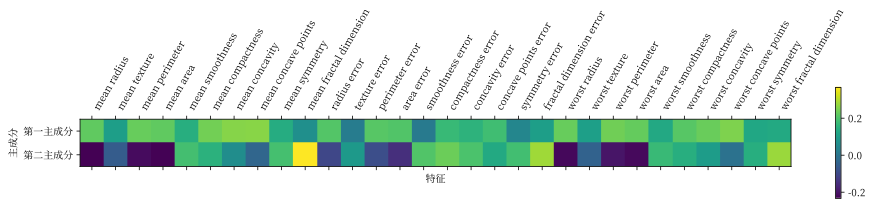

In [41]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["第一主成分", "第二主成分"])
plt.colorbar()
plt.xticks(
    range(len(cancer.feature_names)), cancer.feature_names,
    rotation=60, ha='left'
)
plt.xlabel("特征")
plt.ylabel("主成分")
plt.show()

从上图，第一主成分中所有特征的符号相同，这意味着在所有特征之间存在普遍的相关性，如果一个测量值较大，其他的测量值可能也较大。第二个主成分的的符号有正有负。两个主成分都包含 30 个主要特征。

#### 4.1.2 特征提取的特征脸

PCA 的另一个应用时特征提取。特征提取背后的思想是：可以找到一致数据表示，比给定的原始表示更适合分析。特征提取的一个应用实例是图像。图像由像素组成，通常存储为 RGB 强度。图像中的对象通常有成千个像素组成，它们只有放在一起才有意义。

下面用 PCA 处理 Wild 数据集 Labeled Faces（标记人脸）中的人脸图像。我们使用这些人脸图像的灰度版本，并将它们按比例缩小以加快处理速度。

> Labels Faces 数据集包含从互联网下载的名人人脸图像，包含从 21 世纪初开始的政治家、歌手、演员和运动员的人脸图像。

图像形状: (3023, 87, 65)
类别数量: 62


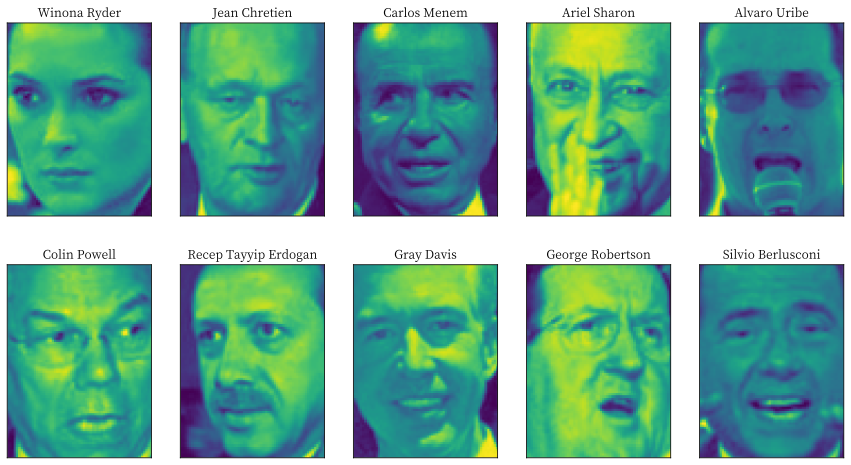

In [42]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print("图像形状: {}".format(people.images.shape))
print("类别数量: {}".format(len(people.target_names)))
fig, axes = plt.subplots(
    2, 5, figsize=(15, 8),
    subplot_kw={'xticks': (), 'yticks': ()}
)
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

共有 3023 张图像，每张图像包含 87 x 65 个像素，分属 62 个不同的人。

In [43]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

如上所示，这个数据集有些偏斜，每个人物对应的图像数量差别很大。为了降低数据偏斜，规定对每个人最多只取 50 张图像。

In [44]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到 0-1 之间，而不是 0-255 之间
# 以获得更好的数据稳定性
X_people = X_people / 255.

人脸识别最常见的人物是判断某个前所未见的人脸是否属于数据库中的某个已知人物。解决该问题的方法之一就是构建一个分类器，每个人都是一个单独的类别。但人脸数据库通常有很多人，每个人的图像可能很少，这会导致训练样本不足，难以构建一个有效的分类器。另外，我们可能还需要随时添加一个新人物，不需要重新训练一个大模型。

一种简单的解决方法是使用单一最近邻分类器，寻找与要分类的人脸最为相似的人脸。这个分类器原则上可以处理每个分类器中只有一个训练数据点的情况。下面使用 `KNeighborsClassifier` 看一下其表现。

In [45]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("测试集分数: {}".format(knn.score(X_test, y_test)))

测试集分数: 0.21511627906976744


相比 $\frac{1}{62}$ 的猜测精度来说，22% 的精度不算太差，但离实际应用还有很远的距离。

下面就可以用到 PCA。想要度量人脸的相似度，计算原始像素空间中的距离是一种相当糟糕的方法（如果将人脸向右移动一个像素将会发生巨大变化）。用像素来比较两张图像时，我们比较的是每个像素与另一张图像对应位置的像素的灰度值。我们希望沿着主方向的距离可以提高精度。

这里启用 PCA 的 **白化（whitening）** 选项，它将主成分缩放到相同的尺度。变换后的结果与使用 `StandardScaler` 的效果类似。白化不仅对应于旋转数据，还对应于缩放数据使其形状是圆形而不是椭圆形。

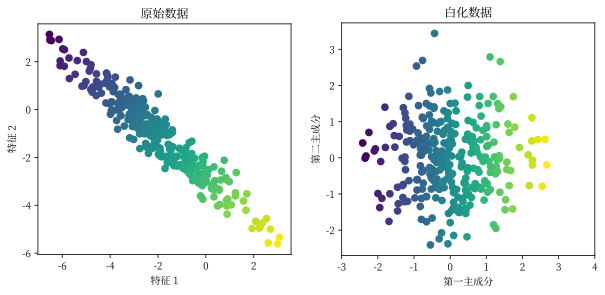

In [46]:
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

pca = PCA(whiten=True)
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].set_title("原始数据")
axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
axes[0].set_xlabel("特征 1")
axes[0].set_ylabel("特征 2")
axes[0].set_aspect('equal')

axes[1].set_title("白化数据")
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
axes[1].set_xlabel("第一主成分")
axes[1].set_ylabel("第二主成分")
axes[1].set_aspect('equal')
axes[1].set_xlim(-3, 4)
plt.show()

下面对训练数据拟合 PCA 对象，并提取前 100 个主成分。然后对训练数据和测试数据进行变换。

In [47]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train 形状：{}".format(X_train_pca.shape))

X_train 形状：(1547, 100)


新数据有 100 个特征，即前 100 个主要成分。现在可以用这些数据来训练分类器。

In [48]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("测试集精度: {}".format(knn.score(X_test_pca, y_test)))

测试集精度: 0.29651162790697677


训练集精度有所提高，但还不够，对于图像数据，我们还可以很容易地将找到的主成分可视化。成分对应空间里的方向，这里的输入空间是 $87 \times 65$ 像素的灰度空间，所以在这个空间中 的方向也是 $87 \times 65$ 像素的灰度空间。下面看一下前几个主成分。

主成分形状：(100, 5655)


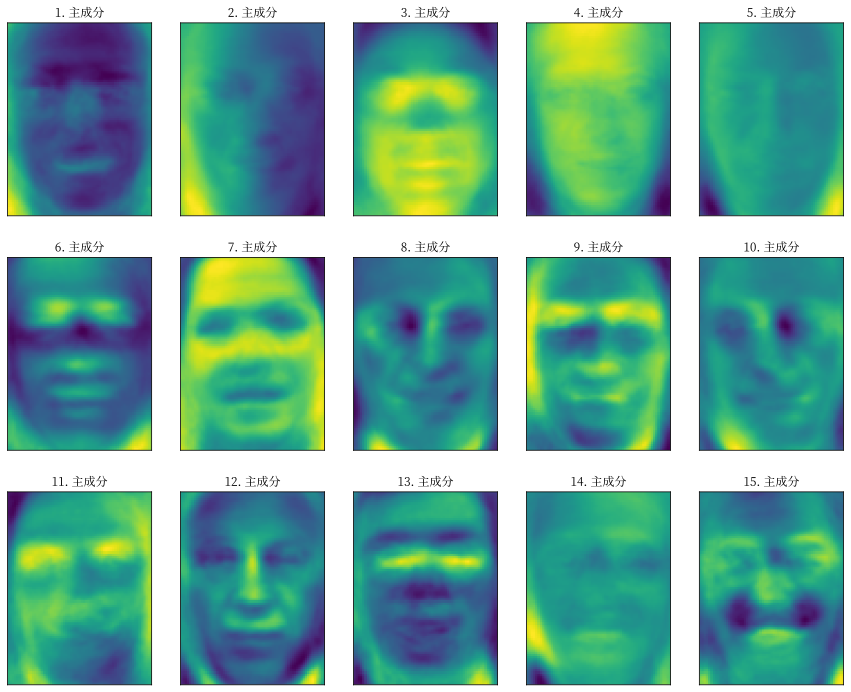

In [49]:
print("主成分形状：{}".format(pca.components_.shape))
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(people.images[0].shape), cmap='viridis')
    ax.set_title("{}. 主成分".format((i + 1)))
plt.show()